<a href="https://colab.research.google.com/github/poojashreeNS/ANN_Techniques/blob/main/NEWDATA_Conversational_Sentiment_Analysis_6_Zeyneb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports 

In [ ]:
!pip install tensorflow
!pip install livelossplot   
!pip install shap 
!pip install transformers     

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 5.7 MB/s 
     |████████████████████████████████| 381 kB 57.6 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.30 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but yo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 4.0 MB/s 
     |████████████████████████████████| 101 kB 12.1 MB/s 
     |████████████████████████████████| 596 kB 50.7 MB/s 
     |████████████████████████████████| 6.6 MB 42.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# 70 20 10 split
# tasks: remap and run data models
# baseline from other paper's algorithms
# forward models file  

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

import random
import re 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences 

import tensorflow as tf 
import keras
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Input, Conv1D, Flatten, MaxPooling1D, Dropout, GlobalMaxPooling1D, Bidirectional, GRU, CuDNNGRU, Activation, GlobalAveragePooling1D 
from keras.layers import Dot, Reshape, TimeDistributed, concatenate, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.merge import concatenate
from keras.models import Model

from keras.losses import SparseCategoricalCrossentropy
from livelossplot import PlotLossesKeras
from keras.callbacks import Callback

from transformers import DistilBertTokenizer, TFDistilBertModel, DistilBertConfig 
from transformers import TFBertModel, BertConfig, BertTokenizer,TFBertForSequenceClassification

from keras.utils.vis_utils import plot_model 

from google.colab import files


### Load Data + basic functions

#### load in data

In [ ]:
ASIST_tabular_cols = [ 
                'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'WC',  
                'BigWords', 'Dic', 'Linguistic', 'function', 'pronoun', 'ppron', 
                'i', 'we', 'you', 'shehe', 'they', 'ipron', 'det', 'article', 'number', 
                'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'quantity', 
                'Drives', 'affiliation', 'achieve', 'power', 'Cognition', 'allnone', 
                'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'certitude', 
                'differ', 'memory', 'Affect', 'tone_pos', 'tone_neg', 'emo_pos', 
                'emo_neg', 'emo_anx', 'emo_anger', 'emo_sad', 'swear', 'Social', 
                'socbehav', 'prosocial', 'polite', 'conflict', 'moral', 'comm', 'socrefs', 
                'family', 'friend', 'female', 'male', 'Culture', 'politic', 'ethnicity', 'tech',
                'Lifestyle', 'leisure', 'home', 'work', 'money', 'relig', 'Physical', 
                'health', 'illness', 'wellness', 'mental', 'substances', 'sexual', 
                'food', 'death', 'need', 'want', 'acquire', 'lack', 'fulfill', 'fatigue', 
                'reward', 'risk', 'curiosity', 'allure', 'Perception', 'attention', 'motion',
                'space', 'visual', 'auditory', 'feeling', 'time', 'focuspast', 'focuspresent',
                'focusfuture', 'Conversation', 'netspeak', 'assent', 'nonflu', 'filler', 'AllPunc',
                'Apostro', 'OtherP', 'voice_probability', 'pcm_loudness', 'F0']



In [ ]:
tabular_cols = ['Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'BigWords', 'Dic', 
 'Linguistic', 'function', 'pronoun', 'ppron', 'i', 'we', 'you', 'shehe', 
 'they', 'ipron', 'det', 'article', 'number', 'prep', 'auxverb', 'adverb', 
 'conj', 'negate', 'verb', 'adj', 'quantity', 'Drives', 'affiliation', 'achieve', 
 'power', 'Cognition', 'allnone', 'cogproc', 'insight', 'cause', 'discrep', 
 'tentat', 'certitude', 'differ', 'memory', 'Affect', 'tone_pos', 
 'tone_neg', 'emotion', 'emo_pos', 'emo_neg', 'emo_anx', 'emo_anger', 
 'emo_sad', 'swear', 'Social', 'socbehav', 'prosocial', 'polite', 
 'conflict', 'moral', 'comm', 'socrefs', 'family', 'friend', 
 'female', 'male', 'Culture', 'politic', 'ethnicity', 'tech',
 'Lifestyle', 'leisure', 'home', 'work', 'money', 'relig', 'Physical', 
 'health', 'illness', 'wellness', 'mental', 'substances', 'sexual', 'food', 
 'death', 'need', 'want', 'acquire', 'lack', 'fulfill', 'fatigue', 'reward', 
 'risk', 'curiosity', 'allure', 'Perception', 'attention', 'motion', 'space', 
 'visual', 'auditory', 'feeling', 'time', 'focuspast', 'focuspresent', 'focusfuture',
 'Conversation', 'netspeak', 'assent', 'nonflu', 'filler', 'AllPunc', 'Period', 'Comma',
 'QMark', 'Exclam', 'Apostro', 'OtherP','voice_probability', 'pcm_loudness', 'F0']


In [ ]:
# LIWC COLUMNS WHICH ARE NOT IN COMMON IN MISC_ASIST VS CONVEX:
## 'emotion', 'Period', 'Comma', 'QMark', 'Exclam' 


In [ ]:
## read data 
train_data_CONVEX = pd.read_csv('/content/drive/MyDrive/ICANN/Proj-Sentiment-Conversational/Datasets/CONVEX-proj-sentiment-conversational/CONVEX_June28_LIWC_sentiments_annotated.csv')
train_auds_CONVEX = pd.read_csv('/content/drive/MyDrive/ICANN/Proj-Sentiment-Conversational/Datasets/CONVEX-proj-sentiment-conversational/CONVEX_June 28_Prosodic_sentiments_annotated.csv')

train_auds_CONVEX.set_axis(['ind', 'filename', 'pcm_loudness', 'voice_probability', 'F0','F0_env','F0_all','Study_Number','Search_Task','Content','Sentiment'], axis=1, inplace=True)

In [ ]:
df = pd.merge(train_data_CONVEX,train_auds_CONVEX[['pcm_loudness','voice_probability','F0','Content']],on='Content')

In [ ]:
## text preprocessing

from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords') 
from nltk.corpus import stopwords
stop_list = stopwords.words('english')  
stop_list.extend(['yeah','um'])

def preprocess(text):
    ## simple cleaning 
    if type(text)!=str:
      return ''
    text = text.lower()
    text = re.sub(r'[/(){}\[\]\|@,;]',' ',text)
    text = ' '.join([w for w in text.split(' ') if w not in stop_list])
    #stemmer = PorterStemmer()
    #text = ' '.join([stemmer.stem(w) for w in text.split(' ')])

    return text  

def preprocess_version_2(text):
    ## simple cleaning 
    if type(text)!=str:
      return ''
    text = text.lower()
    #text = re.sub(r'[/(){}\[\]\|@,;]',' ',text)
    #text = ' '.join([w for w in text.split(' ') if w not in stop_list])
    #stemmer = PorterStemmer()
    #text = ' '.join([stemmer.stem(w) for w in text.split(' ')])

    return text         

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### prepare data 

In [ ]:
  
## prepare data 

df_train, df_test, _, _ = train_test_split(df,df['Sentiment'],test_size=0.2,random_state=1)  

def prepareData(data):
    encoder = {'Frustration/Upset':0, 'Cautious':1,'Neutral':2, 'Surprise':3,'Content':4}
    output_num = len(encoder.keys())

    le = data['Sentiment'].apply(lambda x: encoder[x]).values 
      
    out_classes = to_categorical( 
      le, num_classes=output_num) 

    data['target'] = [x for x in out_classes]

    liwc_aud = data[tabular_cols]
    liwc = liwc_aud.drop(['voice_probability', 'pcm_loudness', 'F0'],axis=1).to_numpy()
    aud = liwc_aud[['voice_probability', 'pcm_loudness', 'F0']].to_numpy()

    text = data['Content'].values

    '''
      le_t = np.array([encoder[c] for c in text_y])
      text_y = to_categorical( 
        le_t, num_classes=7) 
    '''

    return liwc_aud.to_numpy(), liwc, aud, text, np.array([list(x) for x in data['target'].values]),np.array([list(x) for x in data['target'].values])

X_train_tab, X_train_liwc, X_train_aud, X_train_text,y_train_tab,y_train_text = prepareData(df_train)
X_test_tab, X_test_liwc, X_test_aud, X_test_text,y_test_tab,y_test_text = prepareData(df_test)



In [ ]:
X_train_text = np.array([preprocess_version_2(text) for text in X_train_text])  
X_test_text = np.array([preprocess_version_2(text) for text in X_test_text])

In [ ]:
X_train_tab.shape, X_train_text.shape, y_train_tab.shape, y_train_text.shape

((15878, 119), (15878,), (15878, 5), (15878, 5))

In [ ]:
X_test_tab.shape, X_test_text.shape, y_test_tab.shape, y_test_text.shape 

((3970, 119), (3970,), (3970, 5), (3970, 5))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


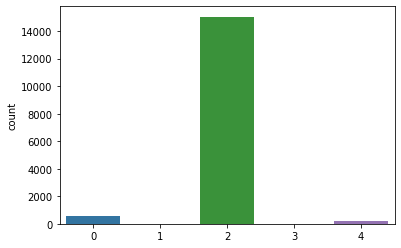

In [ ]:
sns.countplot([c.argmax() for c in y_train_tab])  

In [ ]:
def predictions(preds):
  z = np.zeros(len(preds))
  z[np.argmax(preds)] = 1 
  return z
  
  return z  
def evaluate_model(y_true, y_preds):
  print(classification_report([np.argmax(y) for y in y_true],[np.argmax(y) for y in y_preds]))
  print(confusion_matrix([np.argmax(y) for y in y_true],[np.argmax(y) for y in y_preds]))
 

# Check

In [ ]:
X_train_tab.shape, X_train_text.shape, y_train_tab.shape, y_train_text.shape 

((15878, 119), (15878,), (15878, 5), (15878, 5))

In [ ]:
X_train_tab[0], X_train_text[0], y_train_tab[0]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


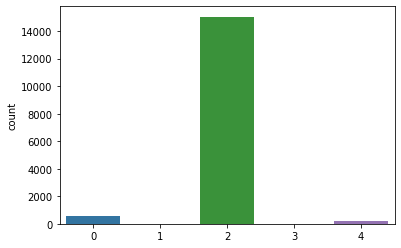

In [ ]:
sns.countplot([np.argmax(c) for c in y_train_text]) ## heavily imbalanced [neutral]

# Models (Text)

BERT [fine tune by itsself]

In [ ]:
def tokenize_bert(X_train_text,y_train_text, tokenizer):
  

  input_ids=[]
  attention_masks=[]

  for sent in X_train_text:
      bert_inp=tokenizer.encode_plus(sent,add_special_tokens = True,max_length =100,pad_to_max_length = True,return_attention_mask = True)
      input_ids.append(bert_inp['input_ids'])
      attention_masks.append(bert_inp['attention_mask']) 
  
  input_ids=np.asarray(input_ids)
  attention_masks=np.array(attention_masks)
  labels=np.array([np.argmax(c) for c in y_train_text]) 

  return input_ids, attention_masks, labels 


In [ ]:
def train_bert(X_train_text, X_test_text, y_train_text, y_test_text, name, model, tokenizer):
  X_train_input_ids, X_train_attention_masks, y_train_labels = tokenize_bert(X_train_text,y_train_text, tokenizer)
  X_test_input_ids, X_test_attention_masks, y_test_labels = tokenize_bert(X_test_text,y_test_text,tokenizer)  
  
  model_bert = model
  model_bert.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5,epsilon=1e-08,clipnorm=1.0),
      loss=SparseCategoricalCrossentropy(from_logits=True),
      metrics=["accuracy"],
  )  

  model_bert.fit( 
      [X_train_input_ids,X_train_attention_masks], y_train_labels, 
      epochs=4, 
      batch_size=64,  
      callbacks = [PlotLossesKeras()],
      validation_split=0.2
  )
  # model.save_weights(name ) 
  model_bert.save_weights(
    name, overwrite=True, save_format='h5', options=None
)
  # files.download('/content/'+name) 

  
  ## loading weights for predicting
  model_bert = model
  model_bert.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5,epsilon=1e-08,clipnorm=1.0),
      loss=SparseCategoricalCrossentropy(from_logits=True),
      metrics=["accuracy"]
  )  

  model_bert.load_weights('/content/'+name)
  pred_bert = model_bert.predict([X_test_input_ids, X_test_attention_masks])
  print(evaluate_model(y_test_text, np.array(tf.nn.softmax(pred_bert[0])))) 

  return model_bert 
  

In [ ]:
from transformers import TFRobertaForSequenceClassification, RobertaTokenizer  

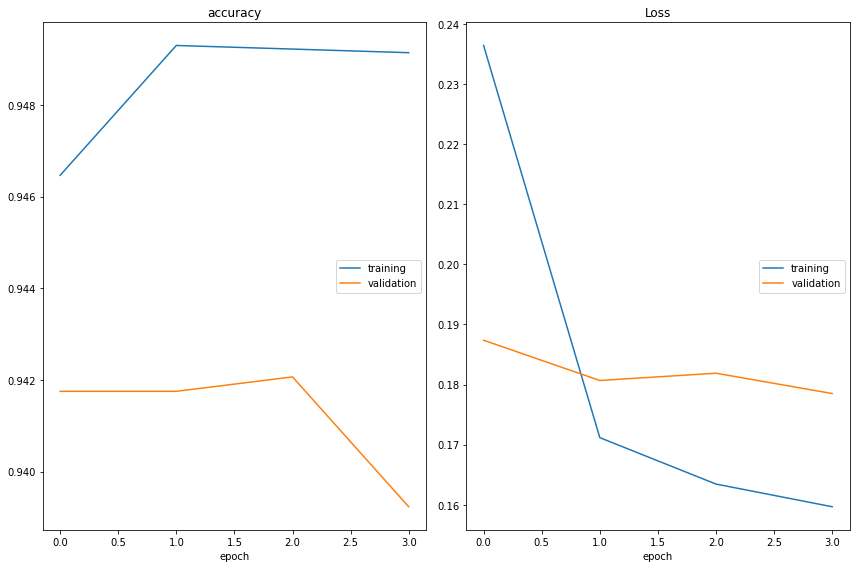

accuracy
	training         	 (min:    0.946, max:    0.949, cur:    0.949)
	validation       	 (min:    0.939, max:    0.942, cur:    0.939)
Loss
	training         	 (min:    0.160, max:    0.236, cur:    0.160)
	validation       	 (min:    0.179, max:    0.187, cur:    0.179)
199/199 [==============================] - 158s 792ms/step - loss: 0.1597 - accuracy: 0.9491 - val_loss: 0.1785 - val_accuracy: 0.9392
              precision    recall  f1-score   support

           0       0.35      0.07      0.11       133
           1       0.00      0.00      0.00         2
           2       0.96      1.00      0.98      3786
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        47

    accuracy                           0.95      3970
   macro avg       0.26      0.21      0.22      3970
weighted avg       0.92      0.95      0.93      3970

[[   9    0  124    0    0]
 [   0    0    2    0    0]
 [  17    1 3768    0    0]
 [   0    0   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_bert = train_bert(X_train_text, X_test_text, y_train_text, y_test_text, 
           'bert_base_ft_CONVEX_v1',TFBertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=5),
            BertTokenizer.from_pretrained('bert-base-uncased') 
) 


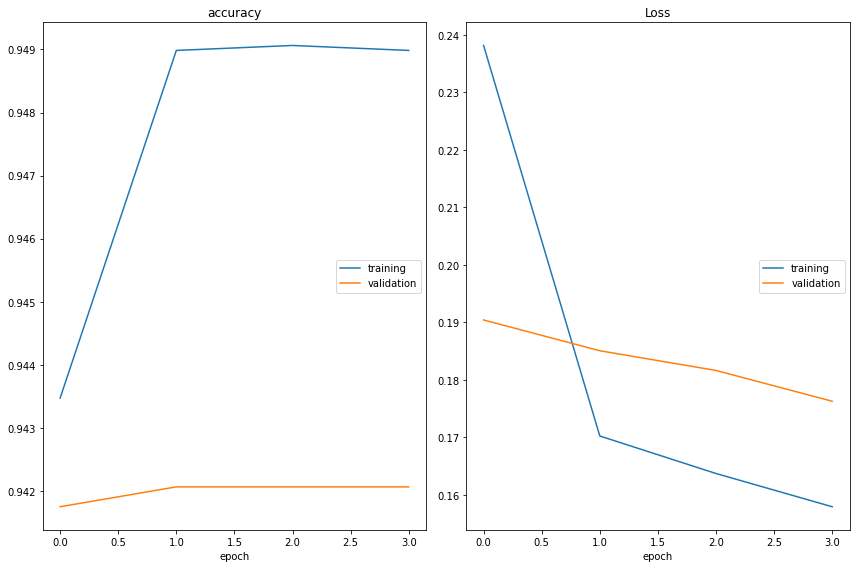

accuracy
	training         	 (min:    0.943, max:    0.949, cur:    0.949)
	validation       	 (min:    0.942, max:    0.942, cur:    0.942)
Loss
	training         	 (min:    0.158, max:    0.238, cur:    0.158)
	validation       	 (min:    0.176, max:    0.190, cur:    0.176)
199/199 [==============================] - 157s 791ms/step - loss: 0.1579 - accuracy: 0.9490 - val_loss: 0.1763 - val_accuracy: 0.9421
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.00      0.00      0.00         2
           2       0.95      1.00      0.98      3786
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        47

    accuracy                           0.95      3970
   macro avg       0.19      0.20      0.20      3970
weighted avg       0.91      0.95      0.93      3970

[[   0    0  133    0    0]
 [   0    0    2    0    0]
 [   1    0 3785    0    0]
 [   0    0   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_bert = train_bert(X_train_text, X_test_text, y_train_text, y_test_text, 
           'bert_base_ft_CONVEX_v2',TFBertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=5),
            BertTokenizer.from_pretrained('bert-base-uncased') 
) 
 

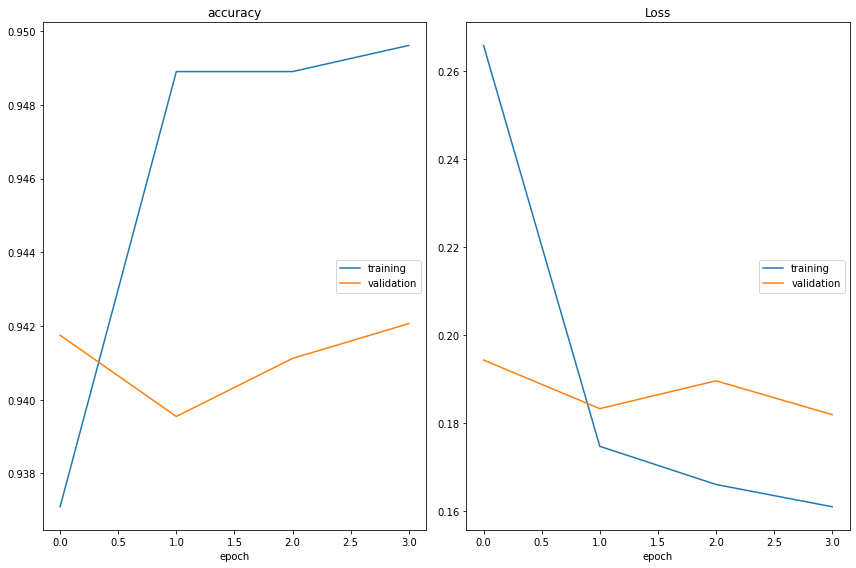

accuracy
	training         	 (min:    0.937, max:    0.950, cur:    0.950)
	validation       	 (min:    0.940, max:    0.942, cur:    0.942)
Loss
	training         	 (min:    0.161, max:    0.266, cur:    0.161)
	validation       	 (min:    0.182, max:    0.194, cur:    0.182)
199/199 [==============================] - 157s 791ms/step - loss: 0.1610 - accuracy: 0.9496 - val_loss: 0.1819 - val_accuracy: 0.9421
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.00      0.00      0.00         2
           2       0.95      1.00      0.98      3786
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        47

    accuracy                           0.95      3970
   macro avg       0.19      0.20      0.20      3970
weighted avg       0.91      0.95      0.93      3970

[[   0    0  133    0    0]
 [   0    0    2    0    0]
 [   0    0 3786    0    0]
 [   0    0   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'\n              precision    recall  f1-score   support\n\n           0       0.02      0.08      0.03        25\n           1       0.00      0.00      0.00       119\n           2       0.31      0.18      0.23       383\n           3       1.00      0.02      0.03       243\n           4       0.02      0.16      0.04        19\n           5       0.51      0.68      0.58       758\n           6       0.00      0.00      0.00         0\n\n    accuracy                           0.38      1547\n   macro avg       0.27      0.16      0.13      1547\nweighted avg       0.48      0.38      0.35      1547\n\n[[  2   0   3   0   4  16   0]\n [ 16   0   5   0  18  80   0]\n [ 38   0  69   0  20 246  10]\n [  8   0  56   4  29 137   9]\n [  1   0   4   0   3  11   0]\n [ 61   0  87   0  74 514  22]\n [  0   0   0   0   0   0   0]]\n\n'

In [ ]:
model_bert = train_bert(X_train_text, X_test_text, y_train_text, y_test_text, 
           'bert_base_CONVEX_v3',TFBertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=5),
            BertTokenizer.from_pretrained('bert-base-uncased') 
) 

## output
'''
              precision    recall  f1-score   support

           0       0.02      0.08      0.03        25
           1       0.00      0.00      0.00       119
           2       0.31      0.18      0.23       383
           3       1.00      0.02      0.03       243
           4       0.02      0.16      0.04        19
           5       0.51      0.68      0.58       758
           6       0.00      0.00      0.00         0

    accuracy                           0.38      1547
   macro avg       0.27      0.16      0.13      1547
weighted avg       0.48      0.38      0.35      1547

[[  2   0   3   0   4  16   0]
 [ 16   0   5   0  18  80   0]
 [ 38   0  69   0  20 246  10]
 [  8   0  56   4  29 137   9]
 [  1   0   4   0   3  11   0]
 [ 61   0  87   0  74 514  22]
 [  0   0   0   0   0   0   0]]

'''

In [ ]:
## base bert without further training for comparison
model_bert_BASE = TFBertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=5)
X_test_input_ids, X_test_attention_masks, y_test_labels = tokenize_bert(X_test_text,y_test_text, BertTokenizer.from_pretrained('bert-base-uncased')) 
pred_bert_BASE = model_bert_BASE.predict([X_test_input_ids,X_test_attention_masks])
evaluate_model(y_test_text, np.array(tf.nn.softmax(pred_bert_BASE[0])))  

## output
'''
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.11      0.13      0.12       119
           2       0.36      0.01      0.02       383
           3       0.00      0.00      0.00       243
           4       0.02      0.42      0.03        19
           5       0.48      0.01      0.03       758
           6       0.00      0.00      0.00         0

    accuracy                           0.03      1547
   macro avg       0.14      0.08      0.03      1547
weighted avg       0.33      0.03      0.03      1547

[[  0   4   0   0   3   0  18]
 [  0  16   1   0  32   0  70]
 [  0  37   4   0 125   8 209]
 [  0  20   0   0  77   3 143]
 [  0   3   0   0   8   1   7]
 [  0  66   6   0 206  11 469]
 [  0   0   0   0   0   0   0]] 
'''

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2307: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the b

              precision    recall  f1-score   support

           0       0.15      0.07      0.09       133
           1       0.00      0.00      0.00         2
           2       1.00      0.00      0.00      3786
           3       0.00      0.00      0.00         2
           4       0.01      1.00      0.02        47

    accuracy                           0.01      3970
   macro avg       0.23      0.21      0.02      3970
weighted avg       0.96      0.01      0.00      3970

[[   9    0    0    0  124]
 [   1    0    0    0    1]
 [  50    0    1    0 3735]
 [   1    0    0    0    1]
 [   0    0    0    0   47]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'\n              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        25\n           1       0.11      0.13      0.12       119\n           2       0.36      0.01      0.02       383\n           3       0.00      0.00      0.00       243\n           4       0.02      0.42      0.03        19\n           5       0.48      0.01      0.03       758\n           6       0.00      0.00      0.00         0\n\n    accuracy                           0.03      1547\n   macro avg       0.14      0.08      0.03      1547\nweighted avg       0.33      0.03      0.03      1547\n\n[[  0   4   0   0   3   0  18]\n [  0  16   1   0  32   0  70]\n [  0  37   4   0 125   8 209]\n [  0  20   0   0  77   3 143]\n [  0   3   0   0   8   1   7]\n [  0  66   6   0 206  11 469]\n [  0   0   0   0   0   0   0]] \n'

### [BERT, DistilBERT, RoBERTa...] Embedding + [BiLSTM, BiGRU...]

In [ ]:
# tokenizes + attention mask 

max_seq = 112

def tokenize(sentences, tokenizer):

    input_ids, input_masks, input_segments = [], [], []
    for sentence in sentences:
        inputs = tokenizer.encode_plus(sentence, 
                                        max_length=max_seq, 
                                        pad_to_max_length=True, 
                                        return_attention_mask=True, 
                                        return_token_type_ids=True, 
                                        truncation=True)
        input_ids.append(inputs['input_ids'])
        input_masks.append(inputs['attention_mask'])
        input_segments.append(inputs['token_type_ids'])        
          
    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32') 



In [ ]:
from keras.layers import Input, Bidirectional, LSTM, GlobalMaxPool1D,Dense,Dropout
from keras import Model

In [ ]:
## Model - BERT + Bidirectional LSTM w/ Attention
def train_bert_bilstm(X_train, y_train, X_test, y_test, model,path_for_ft,tokenizer, ver,outdim=5):
  
  X_train_encoding = tokenize(X_train, tokenizer)
  X_test_encoding = tokenize(X_test, tokenizer)

  BERT = model 
  BERT.load_weights(path_for_ft)
  BERT = BERT.layers[0]
  
  ## set up model architecture

  input_ids_in = Input(shape=(max_seq,), name='input_token', dtype='int32')
  input_masks_in = Input(shape=(max_seq,), name='masked_token', dtype='int32') 


  embedding_layer = BERT(input_ids = input_ids_in, attention_mask = input_masks_in)[0]
  X = Bidirectional(keras.layers.LSTM(128, return_sequences=True))(embedding_layer)
  X = GlobalMaxPool1D()(X) 
  X = Dense(64, activation='relu')(X)
  X = Dropout(0.2)(X)
  X = Dense(outdim, activation='softmax')(X)

  model = Model(inputs=[input_ids_in, input_masks_in], outputs = X)

  for layer in model.layers[:3]:
      layer.trainable = False

  model.summary()   
  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-5), metrics=['accuracy'])

  #checkpt = ModelCheckpoint(ver + '.h5', monitor="val_recall", mode='min', save_best_only=True)
  
  history = model.fit(X_train_encoding,  
                      y_train,
                      epochs = 8,
                      batch_size=32,
                      validation_split=0.1,callbacks=[PlotLossesKeras()]) #,checkpt])
  
  pred_bert = model.predict(X_test_encoding) 
  #pred_bert = [predictions(p) for p in pred_bert]
  evaluate_model(y_test, pred_bert)
  
  model.save(ver) 


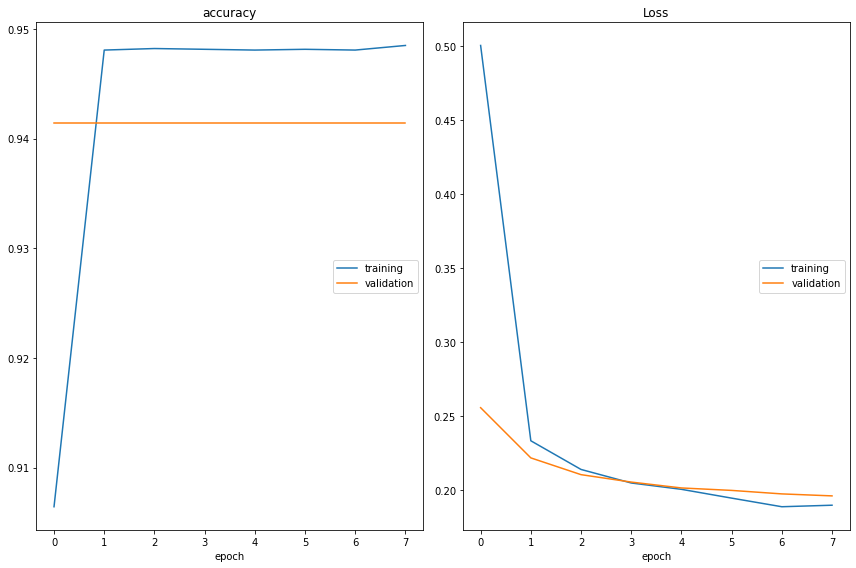

accuracy
	training         	 (min:    0.906, max:    0.948, cur:    0.948)
	validation       	 (min:    0.941, max:    0.941, cur:    0.941)
Loss
	training         	 (min:    0.189, max:    0.500, cur:    0.190)
	validation       	 (min:    0.196, max:    0.256, cur:    0.196)
447/447 [==============================] - 93s 208ms/step - loss: 0.1899 - accuracy: 0.9485 - val_loss: 0.1962 - val_accuracy: 0.9414


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.00      0.00      0.00         2
           2       0.95      1.00      0.98      3786
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        47

    accuracy                           0.95      3970
   macro avg       0.19      0.20      0.20      3970
weighted avg       0.91      0.95      0.93      3970

[[   0    0  133    0    0]
 [   0    0    2    0    0]
 [   0    0 3786    0    0]
 [   0    0    2    0    0]
 [   0    0   47    0    0]]


INFO:tensorflow:Assets written to: bert_bilstm_CONVEX_ver1/assets


INFO:tensorflow:Assets written to: bert_bilstm_CONVEX_ver1/assets


In [ ]:
train_bert_bilstm(X_train_text, y_train_text, X_test_text, y_test_text,
                  TFBertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=5),
                  '/content/bert_base_ft_CONVEX_v1',BertTokenizer.from_pretrained('bert-base-cased'),'bert_bilstm_CONVEX_ver1')



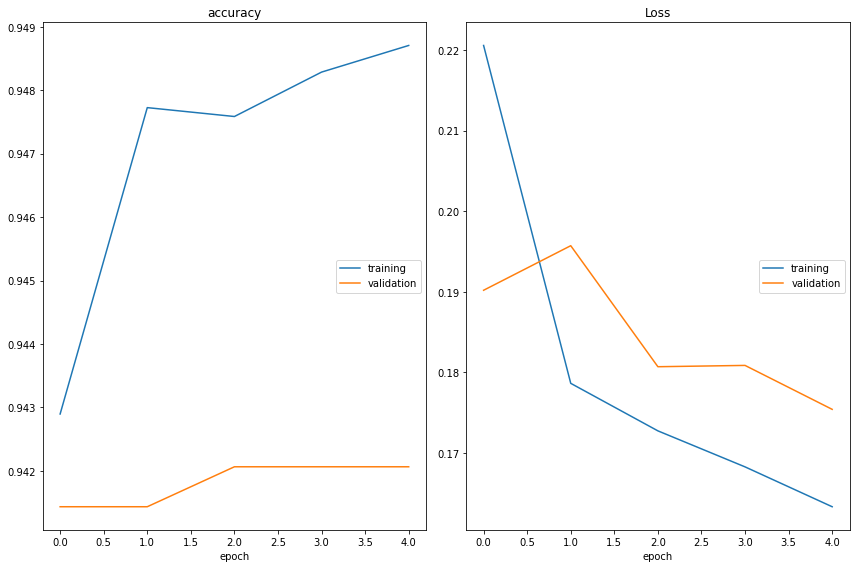

accuracy
	training         	 (min:    0.943, max:    0.949, cur:    0.949)
	validation       	 (min:    0.941, max:    0.942, cur:    0.942)
Loss
	training         	 (min:    0.163, max:    0.221, cur:    0.163)
	validation       	 (min:    0.175, max:    0.196, cur:    0.175)
447/447 [==============================] - 214s 479ms/step - loss: 0.1633 - accuracy: 0.9487 - val_loss: 0.1754 - val_accuracy: 0.9421


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.36      0.06      0.10       133
           1       0.00      0.00      0.00         2
           2       0.96      1.00      0.98      3786
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        47

    accuracy                           0.95      3970
   macro avg       0.26      0.21      0.22      3970
weighted avg       0.92      0.95      0.93      3970

[[   8    0  125    0    0]
 [   0    0    2    0    0]
 [  14    0 3772    0    0]
 [   0    0    2    0    0]
 [   0    0   47    0    0]]


INFO:tensorflow:Assets written to: bert_bilstm_CONVEX_ver2/assets


INFO:tensorflow:Assets written to: bert_bilstm_CONVEX_ver2/assets


In [ ]:
## Model - BERT + Bidirectional LSTM w/ Attention
def train_bert_bilstm2(X_train, y_train, X_test, y_test, ver,outdim=5):
  
  tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

  X_train_encoding = tokenize(X_train, tokenizer)
  X_test_encoding = tokenize(X_test, tokenizer)


  config = BertConfig.from_pretrained('bert-base-cased', output_hidden_states=True, output_attentions=True) ## transfer learning
  BERT = TFBertModel.from_pretrained('bert-base-cased', config=config)
  
  
  ## set up model architecture

  input_ids_in = keras.layers.Input(shape=(max_seq,), name='input_token', dtype='int32')
  input_masks_in = keras.layers.Input(shape=(max_seq,), name='masked_token', dtype='int32') 


  embedding_layer = BERT(input_ids = input_ids_in, attention_mask = input_masks_in)[0]
  X = keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=True))(embedding_layer)
  X = keras.layers.GlobalMaxPool1D()(X) 
  X = keras.layers.Dense(64, activation='relu')(X)
  X = keras.layers.Dropout(0.2)(X)
  X = keras.layers.Dense(outdim, activation='softmax')(X)

  model = keras.Model(inputs=[input_ids_in, input_masks_in], outputs = X)

  for layer in model.layers[:3]:
      layer.trainable = True

  model.summary()   
  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-5), metrics=['accuracy'])

  #checkpt = ModelCheckpoint(ver + '.h5', monitor="val_recall", mode='min', save_best_only=True)
  
  history = model.fit(X_train_encoding,  
                      y_train,
                      epochs = 5,
                      batch_size=32,
                      validation_split=0.1,callbacks=[PlotLossesKeras()]) #,checkpt])
  
  pred_bert = model.predict(X_test_encoding) 
  #pred_bert = [predictions(p) for p in pred_bert]
  evaluate_model(y_test, pred_bert)
  
  model.save(ver)   

train_bert_bilstm2(X_train_text, y_train_text, X_test_text, y_test_text,'bert_bilstm_CONVEX_ver2')


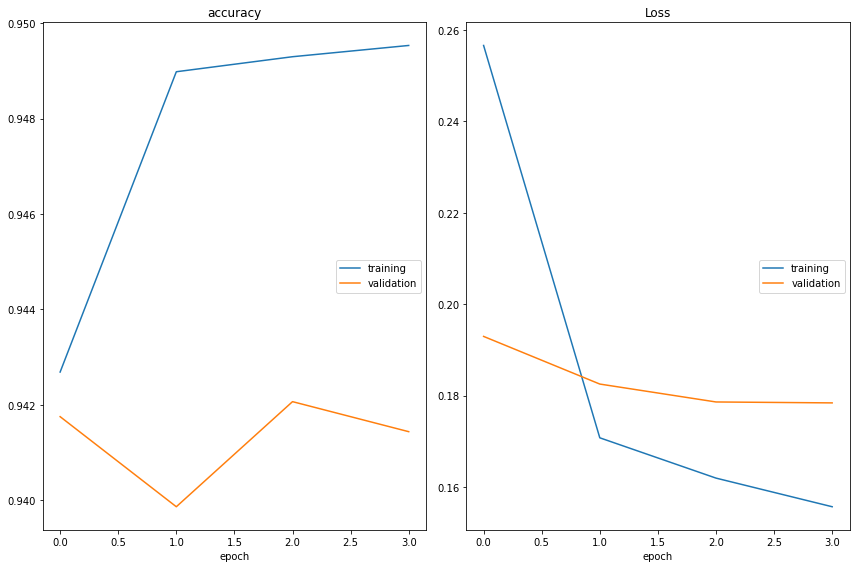

accuracy
	training         	 (min:    0.943, max:    0.950, cur:    0.950)
	validation       	 (min:    0.940, max:    0.942, cur:    0.941)
Loss
	training         	 (min:    0.156, max:    0.257, cur:    0.156)
	validation       	 (min:    0.178, max:    0.193, cur:    0.178)
199/199 [==============================] - 80s 401ms/step - loss: 0.1557 - accuracy: 0.9495 - val_loss: 0.1784 - val_accuracy: 0.9414
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.00      0.00      0.00         2
           2       0.95      1.00      0.98      3786
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        47

    accuracy                           0.95      3970
   macro avg       0.19      0.20      0.20      3970
weighted avg       0.91      0.95      0.93      3970

[[   0    0  133    0    0]
 [   0    0    2    0    0]
 [   2    0 3784    0    0]
 [   0    0    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
## distilbert   
from transformers import TFDistilBertModel, TFDistilBertForSequenceClassification

train_bert(X_train_text, X_test_text, y_train_text, y_test_text, 
           'distilbert_base_ft_COVEX_ver1',TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-cased',num_labels=5),
           DistilBertTokenizer.from_pretrained('distilbert-base-cased'))  

   

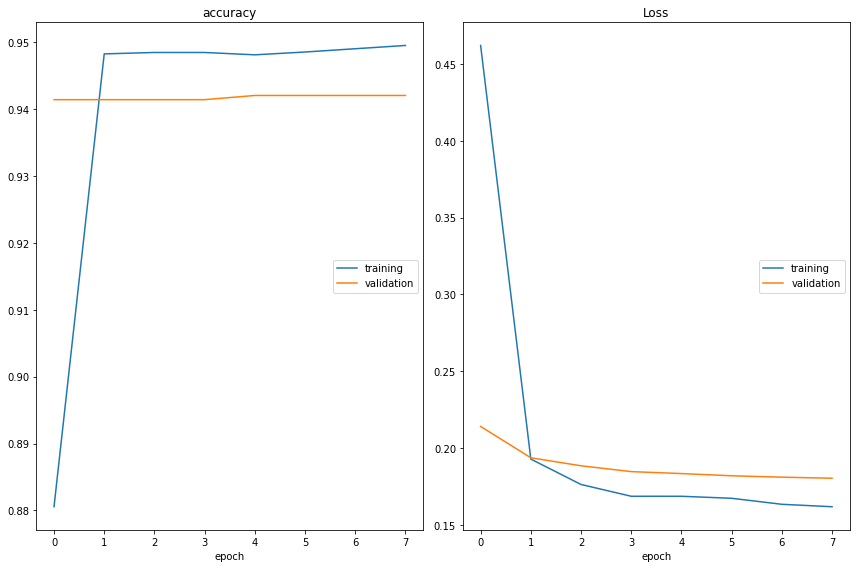

accuracy
	training         	 (min:    0.881, max:    0.950, cur:    0.950)
	validation       	 (min:    0.941, max:    0.942, cur:    0.942)
Loss
	training         	 (min:    0.162, max:    0.462, cur:    0.162)
	validation       	 (min:    0.180, max:    0.214, cur:    0.180)
447/447 [==============================] - 51s 114ms/step - loss: 0.1618 - accuracy: 0.9495 - val_loss: 0.1804 - val_accuracy: 0.9421


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.33      0.06      0.10       133
           1       0.00      0.00      0.00         2
           2       0.96      1.00      0.98      3786
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        47

    accuracy                           0.95      3970
   macro avg       0.26      0.21      0.22      3970
weighted avg       0.92      0.95      0.93      3970

[[   8    0  125    0    0]
 [   0    0    2    0    0]
 [  16    0 3770    0    0]
 [   0    0    2    0    0]
 [   0    0   47    0    0]]


INFO:tensorflow:Assets written to: distilbert_bilstm_CONVEX_ver1/assets


INFO:tensorflow:Assets written to: distilbert_bilstm_CONVEX_ver1/assets


In [ ]:

train_bert_bilstm(X_train_text, y_train_text, X_test_text, y_test_text,
                  TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-cased',num_labels=5),
                  '/content/distilbert_base_ft_COVEX_ver1',DistilBertTokenizer.from_pretrained('distilbert-base-cased'),
                  'distilbert_bilstm_CONVEX_ver1') 

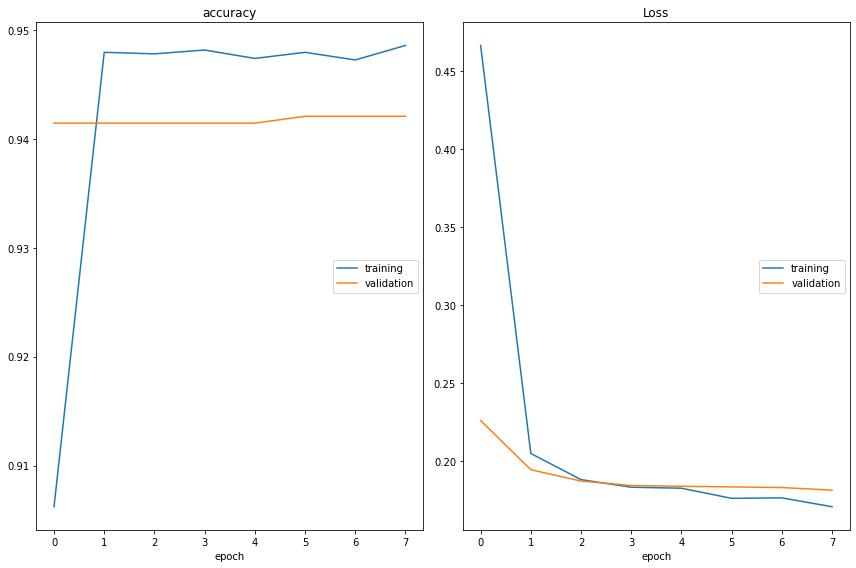

accuracy
	training         	 (min:    0.906, max:    0.949, cur:    0.949)
	validation       	 (min:    0.941, max:    0.942, cur:    0.942)
Loss
	training         	 (min:    0.171, max:    0.466, cur:    0.171)
	validation       	 (min:    0.181, max:    0.226, cur:    0.181)
447/447 [==============================] - 93s 208ms/step - loss: 0.1709 - accuracy: 0.9486 - val_loss: 0.1815 - val_accuracy: 0.9421


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.00      0.00      0.00         2
           2       0.95      1.00      0.98      3786
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        47

    accuracy                           0.95      3970
   macro avg       0.19      0.20      0.20      3970
weighted avg       0.91      0.95      0.93      3970

[[   0    0  133    0    0]
 [   0    0    2    0    0]
 [   0    0 3786    0    0]
 [   0    0    2    0    0]
 [   0    0   47    0    0]]


INFO:tensorflow:Assets written to: roberta_bilstm_CONVEX_ver1/assets


INFO:tensorflow:Assets written to: roberta_bilstm_CONVEX_ver1/assets


In [ ]:
## roberta 
from transformers import TFRobertaModel, RobertaTokenizer, TFRobertaForSequenceClassification 

train_bert(X_train_text, X_test_text, y_train_text, y_test_text, 
           'roberta_base_ft_CONVEX_ver1',TFRobertaForSequenceClassification.from_pretrained('roberta-base',num_labels=7),
           RobertaTokenizer.from_pretrained('roberta-base'))  

train_bert_bilstm(X_train_text, y_train_text, X_test_text, y_test_text,
                  TFRobertaForSequenceClassification.from_pretrained('roberta-base',num_labels=7),
                  '/content/roberta_base_ft_CONVEX_ver1',RobertaTokenizer.from_pretrained('roberta-base'),
                  'roberta_bilstm_CONVEX_ver1')



In [ ]:
def train_bert_bigru(X_train, y_train, X_test, y_test, model,path_for_ft,tokenizer, ver,outdim=7): 
 
  X_train_encoding = tokenize(X_train, tokenizer)
  X_test_encoding = tokenize(X_test, tokenizer) 

  BERT = model 
  BERT.load_weights(path_for_ft)  
  BERT = BERT.layers[0]
 

  ## set up model architecture

  input_ids_in = keras.layers.Input(shape=(max_seq,), name='input_token', dtype='int32')
  input_masks_in = keras.layers.Input(shape=(max_seq,), name='masked_token', dtype='int32') 


  embedding_layer = BERT(input_ids = input_ids_in, attention_mask = input_masks_in)[0]
  X = keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=True))(embedding_layer)
  X = keras.layers.GlobalMaxPool1D()(X) 



  input_ids_in = keras.layers.Input(shape=(max_seq,), name='input_token', dtype='int32')
  input_masks_in = keras.layers.Input(shape=(max_seq,), name='masked_token', dtype='int32')

  embedding = BERT(input_ids = input_ids_in, attention_mask=input_masks_in)[0] 
  gru = Bidirectional(GRU(128))(embedding)
  drop = Dropout(0.5)(gru)    

  out = Dense(128, activation='relu')(drop) 
  out_2 = Dense(64, activation='relu')(drop)  
  outputs = Dense(7, activation='softmax')(out_2) 

  model = Model(inputs=[input_ids_in,input_masks_in], outputs=outputs)   
  
  for layer in model.layers[:3]:
        layer.trainable = False 

  model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
  model.fit(X_train_encoding, y_train_text, epochs=10,batch_size=64)  

  pred_bert = model.predict(X_test_encoding) 
  evaluate_model(y_test, pred_bert)
  

 

In [ ]:
'''model_bert.save_weights(
    'bert_weights', overwrite=True, save_format='h5', options=None
)'''


"model_bert.save_weights(\n    'bert_weights', overwrite=True, save_format='h5', options=None\n)"

In [ ]:
train_bert_bigru(X_train_text, y_train_text, X_test_text, y_test_text,
                  TFBertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=5),
                  '/content/distilbert_base_ft_COVEX_ver1',BertTokenizer.from_pretrained('bert-base-cased'),'bert_bigru_ver_2')


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2307: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


ValueError: ignored

# Tabular

In [ ]:
from keras.metrics import Recall

In [ ]:
def train_model1_liwcaud(X_train,y_train,X_test,y_test,name,num_out=5,loss='categorical_crossentropy',cw=None, epochs = 350):
  model = Sequential()  
  model.add(Dense(256,activation='relu',input_shape=(X_train.shape[-1],)))
  model.add(Dense(256,activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(128,activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(num_out,activation='softmax'))
  model.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy',Recall()])
  print(model.summary()) 

  # normalize tabulars 
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test) 
 
  early_stop = EarlyStopping(patience=40) 
  checkpt = ModelCheckpoint(name + '.h5', save_best_only=True)  
  
  model.fit(X_train,y_train,epochs=epochs, callbacks = [checkpt,early_stop],validation_split=0.1)
                                             
  pred_dbert = model.predict(X_test)
  pred_dbert = [predictions(p) for p in pred_dbert] 
  print(evaluate_model(y_test, pred_dbert)) 
  model.save(name)    

In [ ]:
train_model1_liwcaud(X_train_liwc,y_train_tab,X_test_liwc,y_test_tab,'model_liwc_only_2',epochs=250)   

Prosodic Model

In [ ]:
train_model1_liwcaud(X_train_aud,y_train_tab,X_test_aud,y_test_tab,'model_aud_only_2',epochs=250)   


In [ ]:
model = keras.models.load_model('/content/new/content/model_liwc_3')
from keras.utils.vis_utils import plot_model 
plot_model(model, show_shapes=True, show_layer_names=True)  

In [ ]:
train_model1_liwcaud(X_train_tab,y_train_tab,X_test_tab,y_test_tab,'model_all_2',epochs=250)   

In [ ]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train_liwc)
X_test_s = scaler.transform(X_test_liwc)  

In [ ]:
!pip install shap

In [ ]:
import tensorflow as tf
tf.compat.v1.disable_v2_behavior() 
import shap

liwc_model = keras.models.load_model('/content/model_liwc_only_2')
# SHAP values
shap_exp = shap.DeepExplainer(liwc_model, X_train_s)
shap_values = shap_exp.shap_values(X_test_s[:15]) 

shap.summary_plot(shap_values[0], plot_type = 'bar', feature_names = tabular_cols)


MultiChannel LIWC + Prosodic

In [ ]:
def train_multichannel_liwcaud(X_train_liwc,X_train_aud,y_train,X_test_liwc,X_test_aud,y_test,name,num_out=5,loss='categorical_crossentropy',cw=None, epochs=350):
  
  
  ## liwc 
  inputs_text = Input(shape=(X_train_liwc.shape[-1],))
  X_text = Dense(256,activation='relu')(inputs_text)
  X_text = Dense(256,activation='relu')(X_text)
  X_text = Dropout(0.3)(X_text)
  X_text = Dense(128,activation='relu')(X_text)
  X_text = Dropout(0.3)(X_text)
  X_text = Dense(128,activation='relu')(X_text)
  flat_text = Flatten()(X_text)

  ## prosodic  
  inputs_aud = Input(shape=(X_train_aud.shape[-1],))
  X_aud = Dense(256,activation='relu')(inputs_aud)
  X_aud = Dense(256,activation='relu')(X_aud)
  X_aud = Dropout(0.3)(X_aud)
  X_aud = Dense(128,activation='relu')(X_aud)
  X_aud = Dropout(0.3)(X_aud)
  X_aud = Dense(128,activation='relu')(X_aud)
  flat_aud = Flatten()(X_aud) 
   
  # normalize tabulars 
  scaler = StandardScaler()
  X_train_liwc = scaler.fit_transform(X_train_liwc)
  X_test_liwc = scaler.transform(X_test_liwc) 

  X_train_aud = scaler.fit_transform(X_train_aud)
  X_test_aud = scaler.transform(X_test_aud) 
    
  merged = concatenate([flat_text, flat_aud])

  dense1 = Dense(128, activation='relu')(merged)
  dense2 = Dense(64, activation='relu')(dense1)
  outputs = Dense(5, activation='softmax')(dense2)

  
  model = Model(inputs=[inputs_text, inputs_aud], outputs=outputs)
  for layer in model.layers[:3]:
    layer.trainable = False  
     
  model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

 
  early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=8) 
  checkpt = ModelCheckpoint(name+'.h5', monitor='val_loss', mode='min', save_best_only=True) 

  history = model.fit([X_train_liwc,X_train_aud], y_train, batch_size = 32, epochs=epochs, callbacks=[early_stop,checkpt,PlotLossesKeras()],validation_split=0.1,class_weight=cw) 
   
  preds = model.predict([X_test_liwc,X_test_aud]) 
  preds = [x.argmax() for x in preds] 
  y_true = [x.argmax() for x in y_test]

  print(confusion_matrix(y_true,preds))
  print(classification_report(y_true,preds)) 
  print(accuracy_score(y_true,preds))  
    
  model.save(name)  

  return model   

In [ ]:
model_m = train_multichannel_liwcaud(X_train_liwc,X_train_aud,y_train_tab,X_test_liwc,X_test_aud,y_test_tab,'multi_liwc_aud_ver1',epochs=275)


In [ ]:
pip install --upgrade tabnet

In [ ]:
from tabnet import TabNet, TabNetClassifier  

In [ ]:
## feature columns

liwc_feature_cols = []
for col_name in [c for c in tabular_cols if c not in ['F0','voice_probability','pcm_loudness']]:
    liwc_feature_cols.append(tf.feature_column.numeric_column(col_name))
     
aud_feature_cols = []
for col_name in ['F0','voice_probability','pcm_loudness']:
    aud_feature_cols.append(tf.feature_column.numeric_column(col_name))
    

In [ ]:
def train_multichannel_liwcaud_tabnets(X_train_liwc,X_train_aud,y_train,X_test_liwc,X_test_aud,y_test,name,num_out=7,epochs=350):
  
  ## liwc 
  tn1 = TabNet(feature_columns=liwc_feature_cols, output_dim=32) 
  inputs_text = Input(shape=(X_train_liwc.shape[-1],))
  text_layer = tn1.layers[2](inputs_text)
  text_layer = tn1.layers[3](text_layer)

  #for layer in tn1.layers[3:5]:
  #  text_layer = layer(text_layer)
  
  flat_text = Flatten()(text_layer)
  
  ## prosodic  
  tn2 = TabNet(feature_columns=aud_feature_cols, output_dim=32)
  inputs_aud = Input(shape=(X_train_aud.shape[-1],))
  aud_layer = tn2.layers[2](inputs_aud)
  aud_layer = tn2.layers[3](aud_layer)
  #for layer2 in tn2.layers[3:5]:
  # aud_layer = layer2(aud_layer)  
  flat_aud = Flatten()(aud_layer)
  
  # normalize tabulars 
  scaler = StandardScaler()
  X_train_liwc = scaler.fit_transform(X_train_liwc)
  X_test_liwc = scaler.transform(X_test_liwc) 

  X_train_aud = scaler.fit_transform(X_train_aud)
  X_test_aud = scaler.transform(X_test_aud) 
  
  merged = concatenate([flat_text, flat_aud])

  dense1 = Dense(128, activation='relu')(merged)
  dense2 = Dense(64, activation='relu')(dense1)
  outputs = Dense(5, activation='softmax')(dense2)
  
  model = Model(inputs=[inputs_text, inputs_aud], outputs=outputs)
  for layer in model.layers[:1]:
    layer.trainable = False  
     
  model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(1e-3),
              metrics=['accuracy'])
  
  
  history = model.fit([X_train_liwc,X_train_aud], y_train, batch_size = 32, epochs=epochs,validation_split=0.1) 
   
  preds = model.predict([X_test_liwc,X_test_aud]) 
  preds = [x.argmax() for x in preds] 
  y_true = [x.argmax() for x in y_test]

  print(confusion_matrix(y_true,preds))
  print(classification_report(y_true,preds)) 
  print(accuracy_score(y_true,preds))  
    
  model.save(name)  
   
  return model     
  

In [ ]:
train_multichannel_liwcaud_tabnets(X_train_liwc,X_train_aud,y_train_tab,X_test_liwc,X_test_aud,y_test_tab,'tabnet_liwcandpros_v2',num_out=7, epochs=55)

In [ ]:
'''
from pytorch_tabnet.tab_model import TabNetClassifier

tabnet = TabNetClassifier()

tabnet.fit(X_train=X_train_liwc, y_train=np.array([np.argmax(c) for c in y_train_tab]),
              eval_set=[(X_test_liwc, np.array([np.argmax(c) for c in y_test_tab]))], 
              patience=300, max_epochs=1500,eval_metric=['balanced_accuracy'])   
              
print(classification_report([np.argmax(c) for c in y_test_tab],tabnet.predict(X_test_liwc)))
print(confusion_matrix([np.argmax(c) for c in y_test_tab],tabnet.predict(X_test_liwc)))  
'''

LSTM

In [ ]:
## make model
max_words = 64
max_seq = 64
emb_dim = 100  

model = Sequential()
model.add(Embedding(max_words, emb_dim, input_length=X_train_tab.shape[1])) 
model.add(keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=True)))
model.add(keras.layers.GlobalMaxPool1D())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


## train 
epochs = 60 
batch_size = 64   
 
history = model.fit(X_train_tab, y_train_tab, epochs=epochs, batch_size=batch_size,validation_split=0.1) 

preds = model.predict(X_test_tab)
print(classification_report([np.argmax(c) for c in y_test_tab],[np.argmax(c) for c in preds]))
print(confusion_matrix([np.argmax(c) for c in y_test_tab],[np.argmax(c) for c in preds]))  

 

WideDeep (TabMlp, TabResnet, TabNet, TabTransformer, SAINT, FTTransformer TabPerceiver, TabFastFormer)

https://github.com/jrzaurin/pytorch-widedeep 

In [ ]:
! pip install pytorch-widedeep
! pip install transformers

In [ ]:
import transformers

In [ ]:
import pytorch_widedeep

In [ ]:
import torch 

In [ ]:
from pytorch_widedeep.models import TabMlp, WideDeep, TabResnet, BasicRNN, TabNet, FTTransformer,TabFastFormer 
from pytorch_widedeep.preprocessing import TabPreprocessor
from pytorch_widedeep import Trainer
from pytorch_widedeep.metrics import Accuracy, Recall, Precision 

In [ ]:
train_data = df_train.copy()
test_data = df_test.copy()


In [ ]:
# DeepTabular 
tab_preprocessor = TabPreprocessor(continuous_cols=tabular_cols) 
X_tab = tab_preprocessor.fit_transform(train_data[tabular_cols]) 
 


In [ ]:
tff = TabFastFormer(
    column_idx=tab_preprocessor.column_idx,
    continuous_cols=tabular_cols,
  
)
model = WideDeep(deeptabular=tff , pred_dim=7)
trainer = Trainer(model, objective="categorical_cross_entropy")
trainer.fit(X_tab=X_tab, target=[np.argmax(c) for c in y_train_tab], n_epochs=50, batch_size=256, val_split=0.2)  

In [ ]:
preds = trainer.predict(X_tab = tab_preprocessor.transform(test_data[tabular_cols])) 

print(classification_report([np.argmax(c) for c in y_test_tab],preds))
print(confusion_matrix([np.argmax(c) for c in y_test_tab],preds))  

In [ ]:
ftt = FTTransformer(column_idx=tab_preprocessor.column_idx,  continuous_cols=tabular_cols)
model = WideDeep(deeptabular=ftt, pred_dim=7) 

trainer = Trainer(model, objective="categorical_cross_entropy")
trainer.fit(X_tab=X_tab, target=[np.argmax(c) for c in y_train_tab], n_epochs=50, batch_size=256, val_split=0.2)  

In [ ]:
preds = trainer.predict(X_tab = tab_preprocessor.transform(test_data[tabular_cols])) 

print(classification_report([np.argmax(c) for c in y_test_tab],preds))
print(confusion_matrix([np.argmax(c) for c in y_test_tab],preds))   

In [ ]:
tabresnet = TabResnet(
    column_idx=tab_preprocessor.column_idx,
    continuous_cols=tabular_cols,
    blocks_dims=[200, 100, 100],
    mlp_hidden_dims=[100, 50],
)
model = WideDeep(deeptabular=tabresnet, pred_dim=7) 

In [ ]:
trainer = Trainer(model, objective="categorical_cross_entropy")
trainer.fit(X_tab=X_tab, target=[np.argmax(c) for c in y_train_tab], n_epochs=50, batch_size=256, val_split=0.2) 

In [ ]:
preds = trainer.predict(X_tab = tab_preprocessor.transform(test_data[tabular_cols])) 

print(classification_report([np.argmax(c) for c in y_test_tab],preds))
print(confusion_matrix([np.argmax(c) for c in y_test_tab],preds))  